# Multiclass Classification

Classification is a task where the goal is to predict a target variable based on a set of input features. 

The input features can be continuous, discrete or categorical.

Some types of classification:
* **Binary classification**: The target variable has only two possible classes or outcomes.
* **Multi-class classification**: The target variable has three or more possible classes or outcomes.
* **Multi-label classification**: The target variable has two or more labels and each instance can belong to one or more of these labels.
* **Imbalanced classification**: The target variable has a disproportionate number of instances in different classes.
* **Hierarchical classification**: The target variable has a hierarchical structure, where the classes are organized in a tree-like structure.

## 1. Imports

In [14]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.manifold import TSNE

**seaborn**:  is a Python data visualization library based on Matplotlib. 

**fetch_openml**: to fetch a dataset by your name or id.

**SVC**: Support Vector Classification, it's a machine learning algorithm that which can be used for classification and regression and tries to find the optimal hyperplane that best separates two classes in a dataset.

SVC (Support Vector Classification) is a popular supervised machine learning algorithm used for classification tasks. It is a type of Support Vector Machine (SVM) algorithm that can be used for both linear and non-linear classification problems. The goal of SVC is to find a hyperplane (decision boundary) that maximizes the margin (distance) between the different classes in the data. The data is classified based on which side of the hyperplane it falls on. SVC works well on both small and large datasets and is effective in handling high-dimensional data.

In machine learning, a *hyperplane* is a decision boundary that separates the input feature space into two classes. It is a mathematical construct that is used in various supervised learning algorithms, including classification and regression. The goal of the algorithm is to find the hyperplane that maximally separates the data points based on their class labels.

**cross_val_predict**: "Generate cross-validated estimates for each input data point.
<font size="2">(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)</font>

**confusion_matrix**: "Compute confusion matrix to evaluate the accuracy of a classification."
<font size="2">(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)</font>

**precision_score**: ratio that correctly identifies true positives over all considered positives (true and false positives).

**recall_score**: ratio that correctly identifies true positives over identified and unidentified one's (true positives and false negatives).

**f1_score**: combines the precision and the recall scores of a model, calculating the harmonic mean of precision and recall.

**manifold and TSNE**: 


## 2. Load Dataset

The MNIST dataset is a popular dataset of handwritten digits commonly used for training and testing machine learning models in the field of computer vision. It consists of a training set of 60,000 images and a test set of 10,000 images, each of which is a grayscale image of size 28x28 pixels. The images are labeled with the corresponding digit they represent, ranging from 0 to 9. The dataset is widely used as a benchmark for image classification tasks and has played a key role in advancing the field of computer vision.

IMPORTANT: The MNIST dataset is the same in both Keras and Scikit-learn, but they are packaged and loaded in different ways.

* **Keras**: the MNIST dataset is loaded as a set of four NumPy arrays: train images, train labels, test images, and test labels. The images are 28x28 grayscale images, and the labels are integer values representing the digit in the image.
* **Scikit-learn**: the MNIST dataset is loaded as a single 2D array of shape (n_samples, n_features), where n_samples is the number of images and n_features is the number of pixels in each image. The pixel values are flattened into a single row and scaled to the range [0, 1]. The labels are provided as a separate 1D array of length n_samples.


In [15]:
# load dataset
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [16]:
# check and split data
print('MNIST datatype: ', type(mnist))

print('MNIST columns: ', mnist.keys())

# splitting data and labels
X, y = mnist['data'], mnist['target']

print('X shape: ', X.shape)
print('y shape: ', y.shape)

MNIST datatype:  <class 'sklearn.utils._bunch.Bunch'>
MNIST columns:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
X shape:  (70000, 784)
y shape:  (70000,)


## 3. From splitting in **Train and Test** to the **Model**


**SVC**: supports only a linear kernel, using a one-vs-one strategy (each class versus every other class.).

**fit**: used to generate a learning model by training the parameters.

**train and test mnist**: this database is pre-divided between the first 60.000 occurrences for training data and the last 10.000 occurrences for test data.

**decision_function_shape='ovo'**: ovo stands for "one-vs-one" and means that the algorithm constructs one binary classifier for each pair of classes. Each classifier then predicts which of the two classes the input belongs to. 

In [ ]:
# splitting data into train and test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# splitting the first 60.000 that are designed for training and the last 10.000 for test

svc_classification = SVC(decision_function_shape='ovo')
# decision_function_shape='ovo' 

# TRAINING the SVM classifier
svc_classification.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

## 4. Predictions: in training and in testing

**prediction**: refers to using a trained model to make a prediction on new or unseen data. This involves passing the new data through the trained model to get a predicted outcome or label.

**tain and test**: Data is split into training and testing sets in order to evaluate the performance of a machine learning model. The training set is used to train or fit the model on a subset of the data, while the testing set is used to evaluate the model's performance on new or unseen data. This helps to assess whether the model is overfitting or underfitting the data, and to estimate how well it will perform on new data. The idea is to evaluate the model on data that it has not seen during training to estimate how well it will generalize to new data.

In [ ]:
# Predictions in training
training_prediction = svc_classification.predict(X_train[:10])

# showing prediction and the current value
print('TRAINING predictions: \n')
for pred, actual in zip(training_prediction, y_train):
    print(f"Predicted: {pred}, Actual: {actual}")


TRAINING predictions: 

Predicted: 5, Actual: 5
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1
Predicted: 9, Actual: 9
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 3, Actual: 3
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4


In [ ]:
# Predictions in testing
testing_prediction = svc_classification.predict(X_test[:10])

# showing prediction and the current value
print('TESTING predictions: \n')
for pred, actual in zip(testing_prediction, y_test):
    print(f"Predicted: {pred}, Actual: {actual}")

TESTING predictions: 

Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 9, Actual: 9
Predicted: 6, Actual: 5
Predicted: 9, Actual: 9


## 5. Evaluation

Evaluation refers to the process of assessing the performance of a model on a particular task or dataset. 
The goal of evaluation is to determine how well a model is able to generalize to new, unseen data.
Evaluation can be done in different ways depending on the task and the problem being solved.
It is important to evaluate a model to ensure that it is not overfitting to the training data, and that it is able to generalize to new data. 
This helps to ensure that the model is useful for real-world applications.

There are several evaluation metrics that can be used for machine learning classification problems, for example:
* **Accuracy**: the proportion of correct predictions out of the total number of predictions.
* **Precision**: the proportion of true positives (correctly identified positives) out of all predicted positives.
* **Recall**: the proportion of true positives out of all actual positives (true positives + false negatives).
* **F1 score**: the harmonic mean of precision and recall, which balances both metrics.
* **Confusion matrix**: a table that shows the number of true positives, false positives, true negatives, and false negatives.
* **ROC curve**: a graph that shows the trade-off between true positive rate and false positive rate for different classification thresholds.
* **AUC score**: the area under the ROC curve, which measures the overall performance of a classifier.

**Cross Validation**: 

cross_val_predict is a function provided by scikit-learn that performs cross-validation by splitting the data into **k** folds and returns predicted class labels for each observation in the input data using the estimator object passed as an argument.

can be used for both classification and regression problems. For classification problems, it returns the predicted class labels for each observation in the input data.

The function is similar to cross_val_score but instead of returning the evaluation metric score, it returns the predicted labels for each fold. This function can be used to generate cross-validated estimates for the data, which is useful for assessing the performance of a model and avoiding overfitting.

"Generate cross-validated estimates for each input data point.
The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set."

**cv=**: "Determines the cross-validation splitting strategy".

<font size="2">reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html</font>

In [ ]:
y_train_predict = cross_val_predict(svc_classification, X_train, y_train, cv=3) # ??????????????????????????? manter?

**confusion_matrix**: 

is a table that is used to evaluate the performance of a classification model. It is a 2-dimensional table that shows the number of correct and incorrect predictions made by the model. The table is organized into rows and columns, where each row represents the instances in a predicted class while each column represents the instances in an actual class.

The confusion matrix provides various measures of the model's performance, such as accuracy, precision, recall, and F1 score. It is also useful for identifying the types of errors made by the model, such as false positives and false negatives, which can help in understanding and improving the model's performance.

In [ ]:
confusion_matrix_array = confusion_matrix(y_train, y_train_predict)

print("confusion_matrix_array: \n")
print(confusion_matrix_array)

confusion_matrix_array: 

[[5863    3   10    2    4    8   14    2   13    4]
 [   1 6664   26    9   10    1    3   10   10    8]
 [  19    9 5811   16   26    5    8   30   28    6]
 [   3    9   54 5891    2   62    1   30   61   18]
 [   5   11   13    0 5712    0   20    9    4   68]
 [  11    6   10   57   14 5255   35    4   17   12]
 [  20    8    7    0   10   32 5831    0   10    0]
 [   5   21   42    6   35    2    1 6100    7   46]
 [   8   29   19   38   20   39   21    9 5646   22]
 [  14   11    4   31   72   16    2   59   19 5721]]


In [ ]:
precision = precision_score(y_train, y_train_predict, average="micro")
recall = recall_score(y_train, y_train_predict, average="micro")
f1score = f1_score(y_train, y_train_predict, average="micro")

'''
average= is used to specify the type of averaging to be applied to the individual scores, 
in order to obtain an overall score that summarizes the performance of the classifier.
The "micro" average computes a single score by considering all the true positives, false positives, and false negatives of each class, 
and then aggregating those counts.
'''

print("Precision: ", precision)
print("Recall: ", recall)
print("f1_score: ", f1score)

Precision:  0.9749
Recall:  0.9749
f1_score:  0.9749


## 6. Plotting

In [ ]:
x_train, y_train = mnist['data'], mnist['target']
x_train = x_train[:3000]
y_train = y_train[:3000]

print(x_train.shape)
print(y_train.shape)

(3000, 784)
(3000,)


**TSNE()**: 

**n_components=**: 

**verbose=**: 

**random_state=**: 


In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_train)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.012s...
[t-SNE] Computed neighbors for 3000 samples in 0.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.363197
[t-SNE] KL divergence after 1000 iterations: 1.287075


**hue**: 
**df.y.tolist()**: 

[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

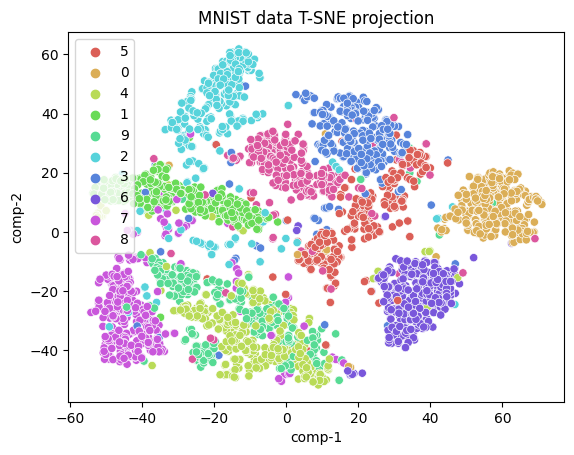

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

In [ ]:
# REQUIRE: 
# aumentar os limites para poder caber a legenda sem sobrepor os pontos.
# aumentar o tamanho do gráfico.
# adequar com os dados de treino e teste previamente ajustados.
# plotar dois gráficos um para treino e outro para teste pós-modelo.